In [2]:

# code for showing image to make a good note: 
import matplotlib.pyplot as plt 
import cv2 as cv 

def showImg(img):
    img = cv.imread(img)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    pass


<br>
<br>

# # 1. Optimization in input pipeline with `Prefetch` 

- ` using prefetch: `

<br>
<br>


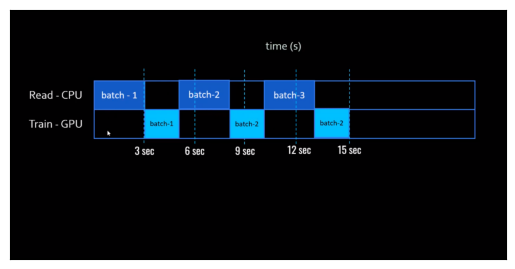

In [3]:

# without prefetch: 

showImg("../note_image/pic31.png")


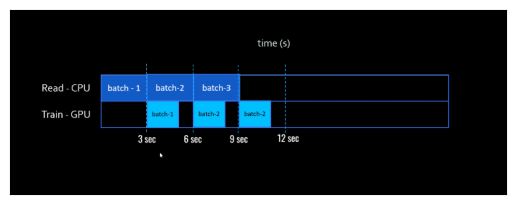

In [4]:

# with prefetch:

showImg("../note_image/pic32.png")



<br>

# ------------------------------------------------------------------------

<br>


In [6]:

import tensorflow as tf 
import time 


In [7]:

tf.__version__


'2.17.0'

<br>
<br>

## First, we will create a artificial dataset: (from tensorflow documentation)

`Start with defining a class inheriting from tf.data.Dataset called ArtificialDataset. This dataset:`

- Generates num_samples samples (default is 3).
- Sleeps for some time before the first item to simulate opening a file.
- Sleeps for some time before producing each item to simulate reading data from a file.

<br>
<br>

### Some info: that is new for me in python: 

`In Python, __new__() is a special method used in classes to control the creation of a new instance of the class. It is the first step in instance creation and is responsible for returning a new instance of the class. Unlike __init__(), which initializes an instance, __new__() is used to actually create the instance before __init__() is called.`

<br>
<br>


In [23]:

class ArtificialDataset(tf.data.Dataset):

    def read_file_in_batch(num_sample):
        # opening the file:
        time.sleep(0.03)
        
        for sample_idx in range(num_sample):
                # Reading data (line, record) from the file
                time.sleep(0.015)
                yield (sample_idx,)
                
                
    def __new__(cls,num_sample=3):
        return tf.data.Dataset.from_generator(
            # cls means AtrificialDataset class
            cls.read_file_in_batch,
            # what it will return `sample_index`
            # TensorSpec(): tensor specification.
            output_signature= tf.TensorSpec(shape=(1,),dtype=tf.int64),
            # aurguments 
            args=(num_sample,)
        )
        



In [18]:


# traning time: 
def train(dataset,num_epoch=2):
    for num in range(num_epoch):
        for sample in dataset:
            time.sleep(0.01)
            
            

In [24]:


%%timeit
train(ArtificialDataset())



2024-09-06 09:14:36.274880: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-06 09:14:36.667202: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-06 09:14:37.431796: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


375 ms ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


2024-09-06 09:14:38.952150: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<br>

### # I will see an error: because i have no GPU: 

`tensorflow/core/framework/local_rendezvous.cc:404, is related to TensorFlow's rendezvous mechanism, which handles the communication between different computational devices (e.g., CPU and GPU)`

<br>

In [25]:

%%timeit
train(ArtificialDataset().prefetch(1))


301 ms ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


2024-09-06 09:21:27.994043: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [27]:

%%timeit
train(ArtificialDataset().prefetch(tf.data.AUTOTUNE))


353 ms ± 38.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<br>
<br>

# # 2. More optimization in input pipeline with `cache`

<br>
<br>

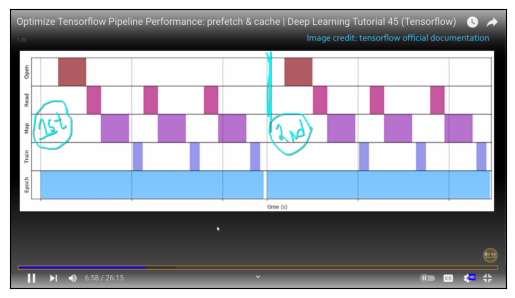

In [28]:
showImg("../note_image/pic35.png")

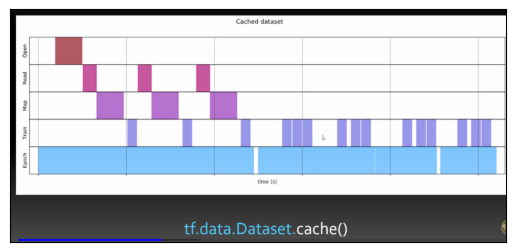

In [29]:
showImg("../note_image/pic36.png")

In [47]:

def mapped_function(s):
    tf.py_function(lambda: time.sleep(0.03),[],())
    return s

In [54]:


%%timeit -n1 -r1 
# without using cache():
train(ArtificialDataset().map(mapped_function),5)

1.67 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [55]:


%%timeit -n1 -r1
# using cache ():
train(ArtificialDataset().map(mapped_function).cache(),5)


566 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
